### IMPORTACIÓN DE PAQUETES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### IMPORTACIÓN DE DATA

In [2]:
data = pd.read_csv("/content/Indice.csv")

In [3]:
df = data.copy()

### EXPLORACIÓN DE DATOS

In [4]:
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

#### TRANSFORMANDO OBJETO A FECHAS

In [6]:
df.date = pd.to_datetime(df.date, dayfirst = True)
df.head()


,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

#### CONFIGURACIÓN DE INDICE

In [8]:
df.set_index("date", inplace=True)

In [9]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [10]:
df.dtypes

spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

#### PLOTTING

In [11]:
import seaborn as sns

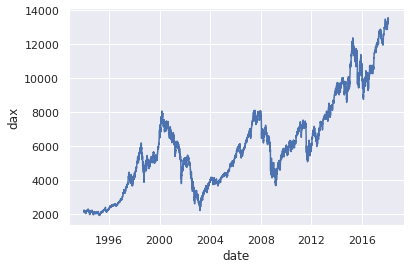

In [12]:
sns.lineplot(x=df.index,y=df.dax)

#### CORRELACIÓN

In [14]:
corr = df.corr()
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
corr.style.background_gradient(cmap='coolwarm')

,spx,dax,ftse,nikkei
spx,1.000000,0.971911,0.903246,0.200011
dax,0.971911,1.000000,0.902839,0.205555
ftse,0.903246,0.902839,1.000000,0.157129
nikkei,0.200011,0.205555,0.157129,1.000000


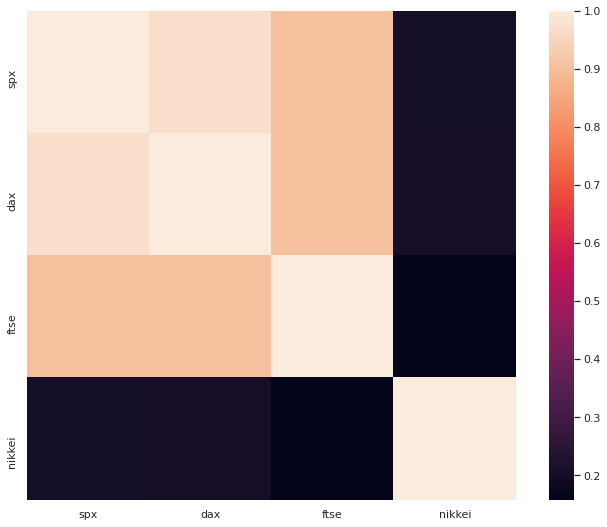

In [15]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


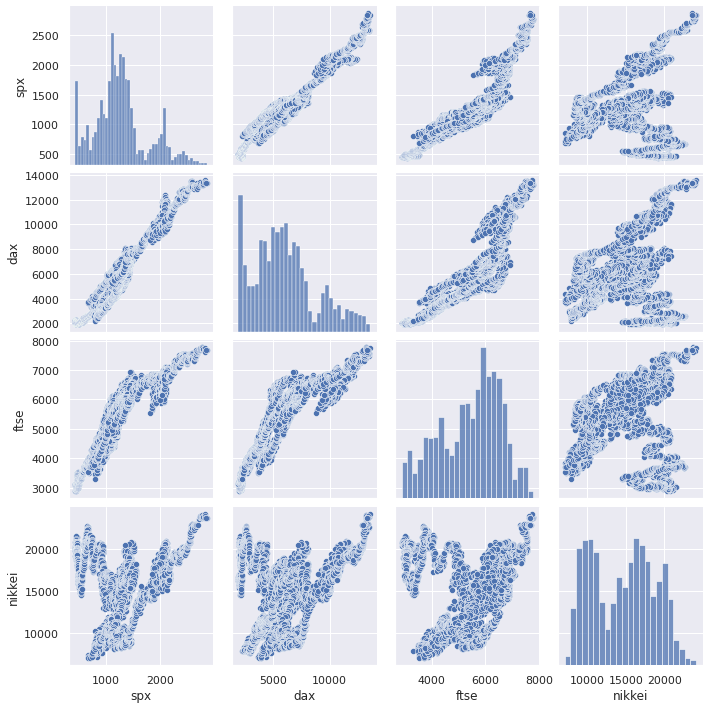

In [16]:
sns.pairplot(df, size = 2.5)
plt.show();

#### MAPAS DE CALOR

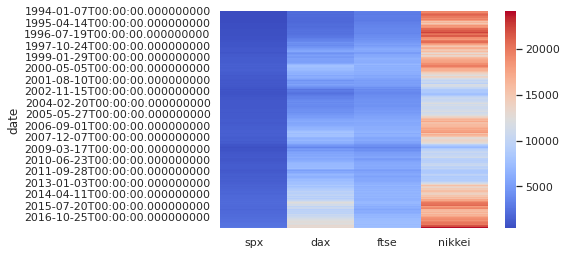

In [ ]:
sns.heatmap(df, cmap='coolwarm')

Los mapas de calor muestran datos tabulares numéricos donde las celdas están coloreadas según el valor contenido. Los mapas de calor son excelentes para hacer que las tendencias en este tipo de datos sean más evidentes, particularmente cuando los datos están ordenados y hay agrupaciones. 

#### DESCRIPTIVOS

In [ ]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


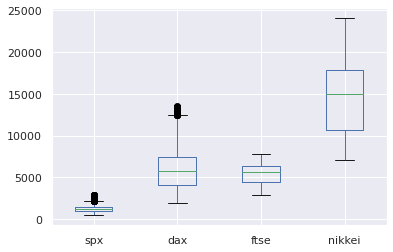

In [ ]:
df.plot.box(df)

#### MANEJO DE DATOS PERDIDOS

In [17]:
df.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [18]:
import missingno as msno

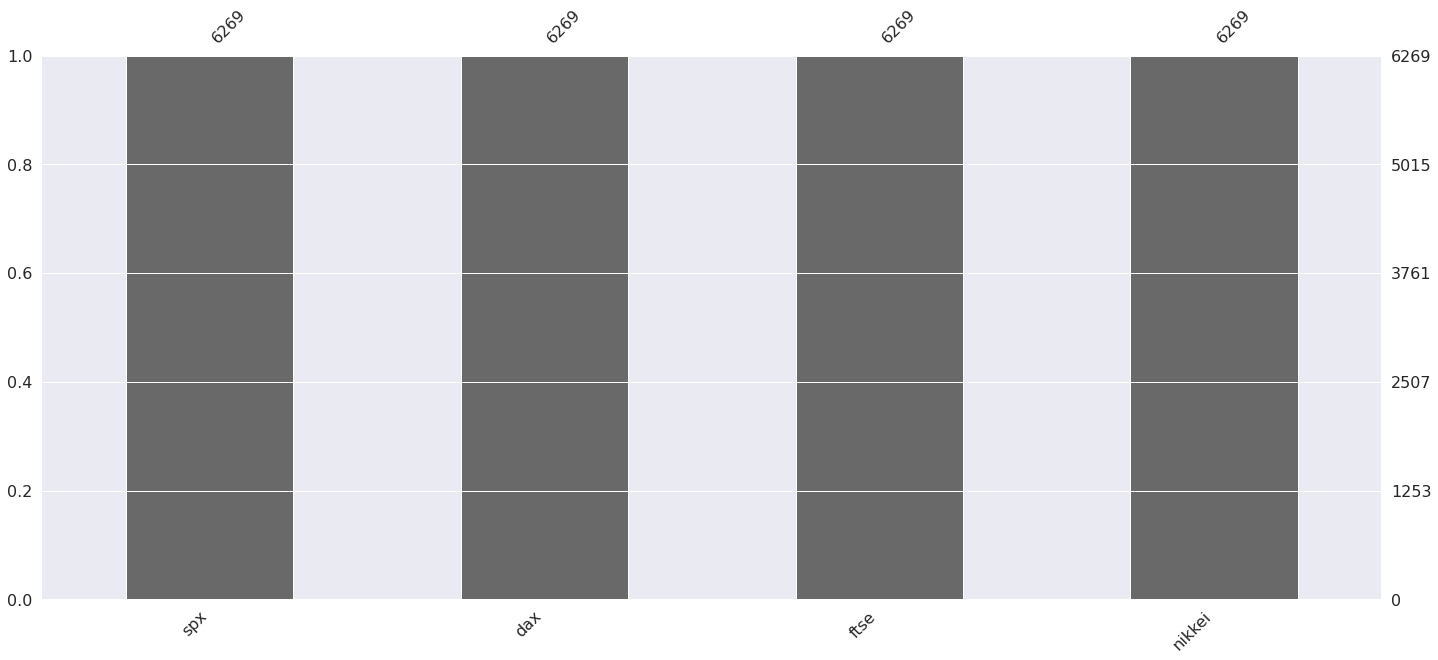

In [19]:
msno.bar(df)

Este gráfico de barras le da una idea de cuántos valores faltantes hay en cada columna. 

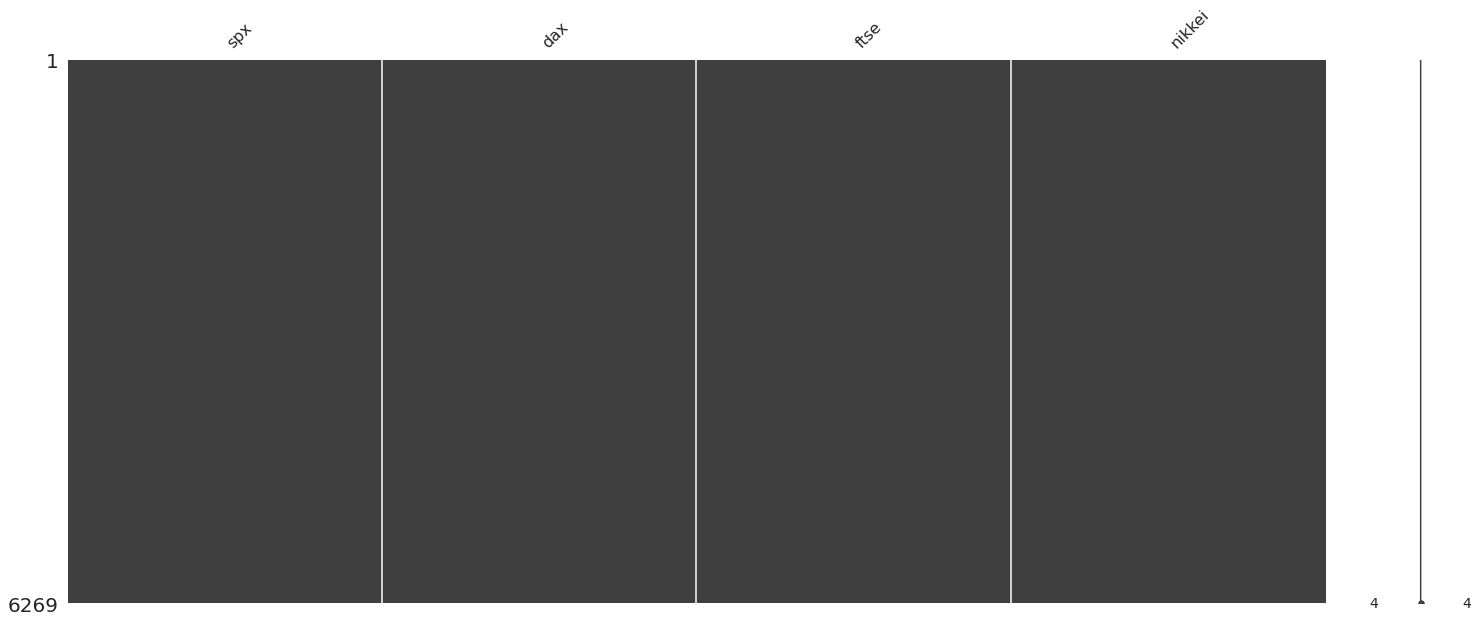

In [20]:
msno.matrix(df)

Con esta matriz, puede encontrar muy rápidamente el patrón de ausencia en el conjunto de datos. 

##### CONTEO DATOS NULOS POR VARIABLES

In [21]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [22]:
df.spx.isna().sum()

0

### PLOTTING SOBRE LA DATA 

In [23]:
import matplotlib.pyplot as plt

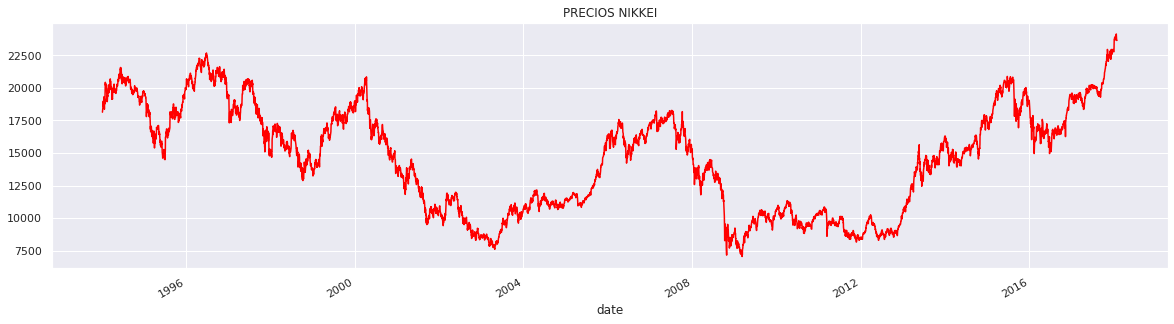

In [24]:
df.nikkei.plot(figsize=(20,5), title = "PRECIOS NIKKEI",color = "red")
plt.show()

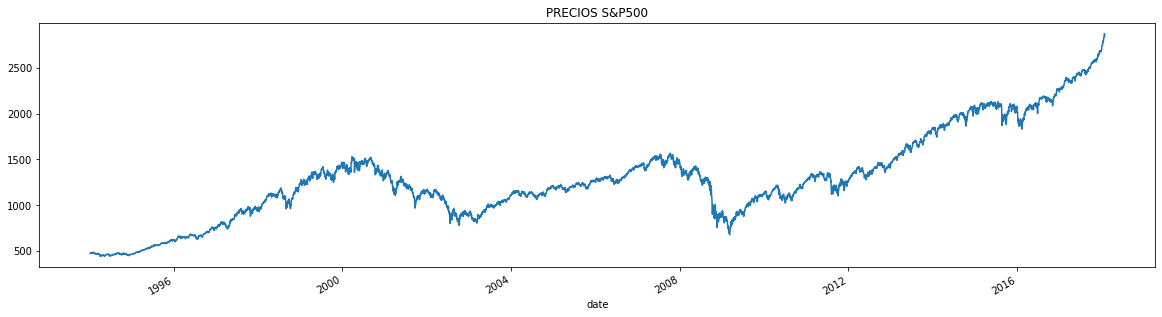

In [ ]:
df.spx.plot(figsize=(20,5), title = "PRECIOS S&P500" )
plt.show()

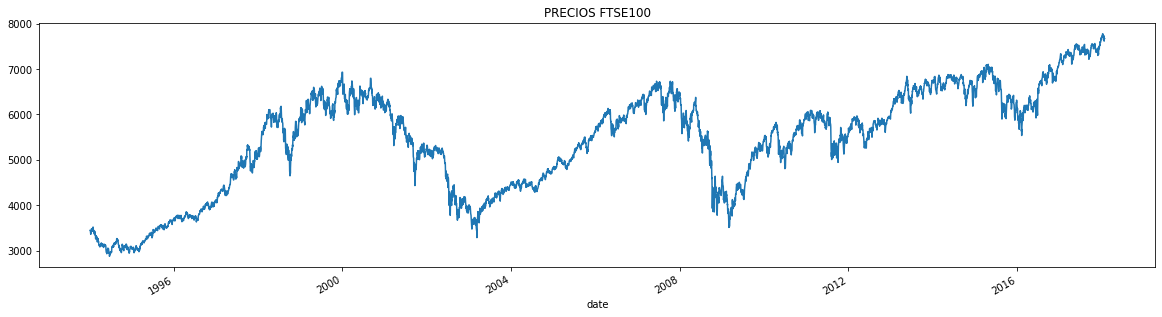

In [ ]:
df.ftse.plot(figsize=(20,5), title = "PRECIOS FTSE100")
plt.show()

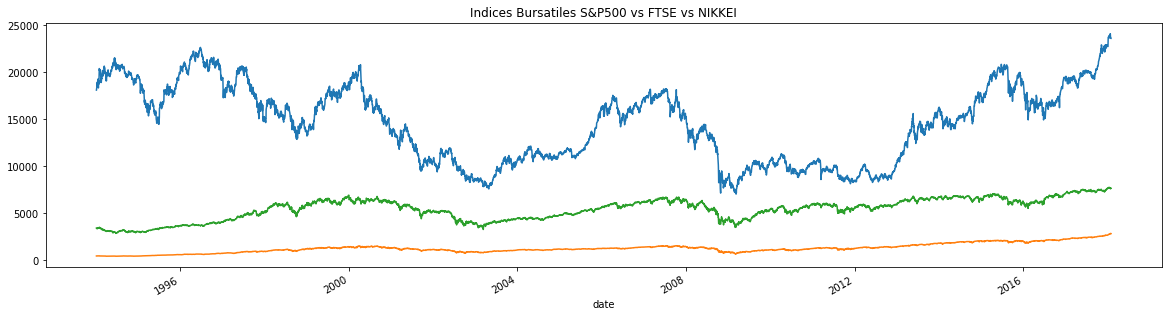

In [ ]:
df.nikkei.plot(figsize=(20,5), title = "PRECIOS NIKKEI")
df.spx.plot(figsize=(20,5), title = "PRECIOS S&P500")
df.ftse.plot(figsize=(20,5), title = "PREIOS FTSE100")
plt.title("Indices Bursatiles S&P500 vs FTSE vs NIKKEI" )
plt.show()

#### ASIMETRÍA

Las medidas de asimetría sirven para tener una idea acerca de la forma de una distribución de frecuencias con sólo un número.

In [ ]:
df.skew()

spx       0.630421
dax       0.623207
ftse     -0.382900
nikkei    0.025756
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


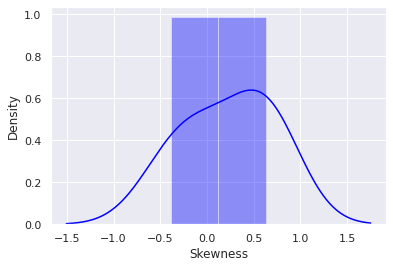

In [ ]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')


#### CURTOSIS

Esta utiliza el moomento central estandarizado de orden 4 para detectar valores extremos. En presencia de valores extremos, la forma de la distribución parece más puntiaguda; por esto la kurtósis se conoce como una medida del apuntalamiento de la distribución.

In [ ]:
df.kurtosis()

spx       0.212285
dax      -0.198897
ftse     -0.746117
nikkei   -1.198919
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


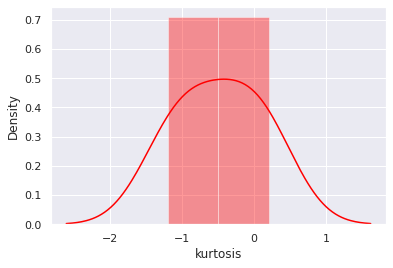

In [ ]:
sns.distplot(df.kurtosis(),color='red',axlabel ='kurtosis')

### QQ PLOT

In [25]:
import scipy.stats

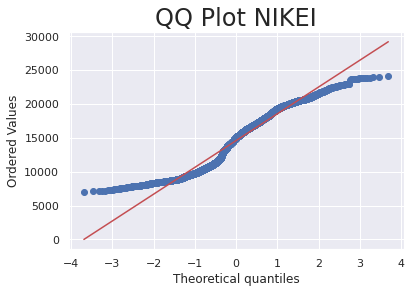

In [26]:
scipy.stats.probplot(df.nikkei, plot =  plt)
plt.title("QQ Plot NIKEI", size = 24)
plt.show()

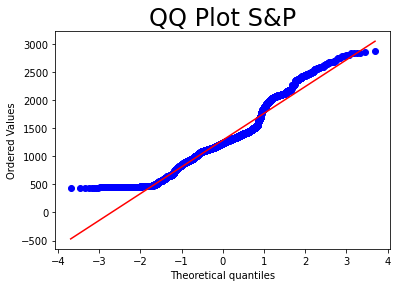

In [ ]:
scipy.stats.probplot(df.spx, plot =  plt)
plt.title("QQ Plot S&P", size = 24)
plt.show()

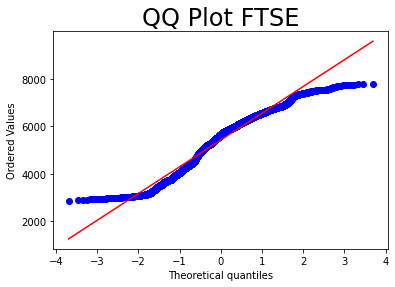

In [ ]:
scipy.stats.probplot(df.ftse, plot =  plt)
plt.title("QQ Plot FTSE", size = 24)
plt.show()